# Look at nuclear speckle size in Meayamycin vs control

In [1]:
from campa.tl import Experiment, FeatureExtractor
from campa.pl import hex2rgb
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad

In [2]:
def add_perturbation_plot(adata):
    # create perturbation_plot column from perturbation_duration column
    p = np.array(adata.obs['perturbation_duration'])
    p[p == 'AZD4573-120'] = 'AZD4573 (2.5h)'
    p[p == 'AZD4573-30'] = 'AZD4573 (1h)'
    p[p == 'CX5461-120'] = 'CX5461 (2.5h)'
    p[p == 'Meayamycin-720'] = 'Meayamycin (12.5h)'
    p[p == 'TSA-30'] = 'TSA (1h)'
    p[p == 'Triptolide-120'] = 'Triptolide (2.5h)'
    p[np.in1d(p, ['DMSO-120', 'DMSO-720', 'normal'])] = 'unperturbed'
    adata.obs['perturbation_plot'] = p
    adata.obs['perturbation_plot'] = adata.obs['perturbation_plot'].astype('category')
    print(adata.obs['perturbation_plot'].cat.categories)
    adata.uns['perturbation_plot_colors'] = ['#377eb8', '#984ea3', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#999999']  #https://gist.github.com/thriveth/8560036


In [3]:
exp = Experiment.from_dir('VAE_all/CondVAE_pert-CC')
extrs = {data_dir: FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_annotation.h5ad')) 
    for data_dir in exp.data_params['data_dirs']}

In [4]:
adata = ad.concat([extr.adata for extr in extrs.values()], index_unique='-', uns_merge='same')
add_perturbation_plot(adata)

Index(['AZD4573 (1h)', 'AZD4573 (2.5h)', 'CX5461 (2.5h)', 'Meayamycin (12.5h)',
       'TSA (1h)', 'Triptolide (2.5h)', 'unperturbed'],
      dtype='object')


In [5]:
cats = ['unperturbed', 'Meayamycin (12.5h)']
colors = [adata.uns['perturbation_plot_colors'][list(adata.obs['perturbation_plot'].cat.categories).index(c)] for c in cats]
colors = np.array(list(map(hex2rgb, colors)))/256.

In [8]:
extrs[list(extrs.keys())[0]].adata.obsm

AxisArrays with keys: co_occurrence_Cajal bodies_Cajal bodies, co_occurrence_Cajal bodies_Extra-nuclear, co_occurrence_Cajal bodies_Nuclear periphery, co_occurrence_Cajal bodies_Nuclear speckles, co_occurrence_Cajal bodies_Nucleolus, co_occurrence_Cajal bodies_Nucleoplasm, co_occurrence_Cajal bodies_PML bodies, co_occurrence_Extra-nuclear_Cajal bodies, co_occurrence_Extra-nuclear_Extra-nuclear, co_occurrence_Extra-nuclear_Nuclear periphery, co_occurrence_Extra-nuclear_Nuclear speckles, co_occurrence_Extra-nuclear_Nucleolus, co_occurrence_Extra-nuclear_Nucleoplasm, co_occurrence_Extra-nuclear_PML bodies, co_occurrence_Nuclear periphery_Cajal bodies, co_occurrence_Nuclear periphery_Extra-nuclear, co_occurrence_Nuclear periphery_Nuclear periphery, co_occurrence_Nuclear periphery_Nuclear speckles, co_occurrence_Nuclear periphery_Nucleolus, co_occurrence_Nuclear periphery_Nucleoplasm, co_occurrence_Nuclear periphery_PML bodies, co_occurrence_Nuclear speckles_Cajal bodies, co_occurrence_Nucl

In [11]:
sns.boxplot?

Signature:
sns.boxplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    dodge=True,
    fliersize=5,
    linewidth=None,
    whis=1.5,
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.


Input data can be passed in a variety of formats, including:

- Vectors of data represented as lists, numpy arrays, or pandas Series
  objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
- A 

(array([0, 1]), [Text(0, 0, 'unperturbed'), Text(1, 0, 'Meayamycin (12.5h)')])

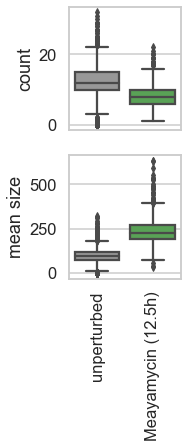

In [28]:
sns.set_style('whitegrid')
sns.set_context('talk')

fig, axes = plt.subplots(2,1, figsize=(2,5), sharex=True)
# object count
df = adata.obsm['object_count'].copy()
df['perturbation_plot'] = adata.obs['perturbation_plot']
sns.boxplot(data=df, y='Nuclear speckles', x='perturbation_plot', order=cats, palette=colors, ax=axes[0])
axes[0].set_ylabel('count')
axes[0].set_xlabel('')

# object size
df = adata.obsm['object_area_mean'].copy()
df['perturbation_plot'] = adata.obs['perturbation_plot']
sns.boxplot(data=df, y='Nuclear speckles', x='perturbation_plot', order=cats, palette=colors, ax=axes[1])
axes[1].set_ylabel('mean size')
axes[1].set_xlabel('')
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'unperturbed'), Text(1, 0, 'Meayamycin (12.5h)')])

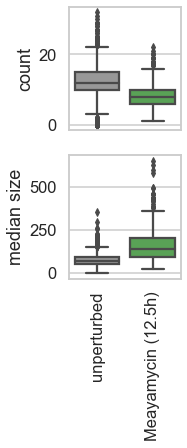

In [27]:
sns.set_style('whitegrid')
sns.set_context('talk')

fig, axes = plt.subplots(2,1, figsize=(2,5), sharex=True)
# object count
df = adata.obsm['object_count'].copy()
df['perturbation_plot'] = adata.obs['perturbation_plot']
sns.boxplot(data=df, y='Nuclear speckles', x='perturbation_plot', order=cats, palette=colors, ax=axes[0])
axes[0].set_ylabel('count')
axes[0].set_xlabel('')

# object size
df = adata.obsm['object_area_median'].copy()
df['perturbation_plot'] = adata.obs['perturbation_plot']
sns.boxplot(data=df, y='Nuclear speckles', x='perturbation_plot', order=cats, palette=colors, ax=axes[1])
axes[1].set_ylabel('median size')
axes[1].set_xlabel('')
plt.xticks(rotation=90)